<a href="https://colab.research.google.com/github/WarunaDissanayake1234/Calories-Burnt-Prediction/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link:



Importing dependancies

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

Data collection and processing

In [34]:
# loading the Calories dataset
calories_data = pd.read_csv('/content/calories.csv')

In [35]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [36]:
# Loading the exercise dataset
exercise_data = pd.read_csv('/content/exercise.csv')

In [37]:
# Checking first 5 rows
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [38]:
# lets check the shape of the dataset
exercise_data.shape

(15000, 8)

Combining the two dataframe

In [39]:
combine_calories_data = pd.concat([exercise_data, calories_data['Calories']],axis=1)

In [40]:
combine_calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Data analysis

In [41]:
# checking data distibution
combine_calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

Finding the Correlation in the dataset

Positive Correlation
Negative Correlation

<ipython-input-42-995960320260>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(exercise_data.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))


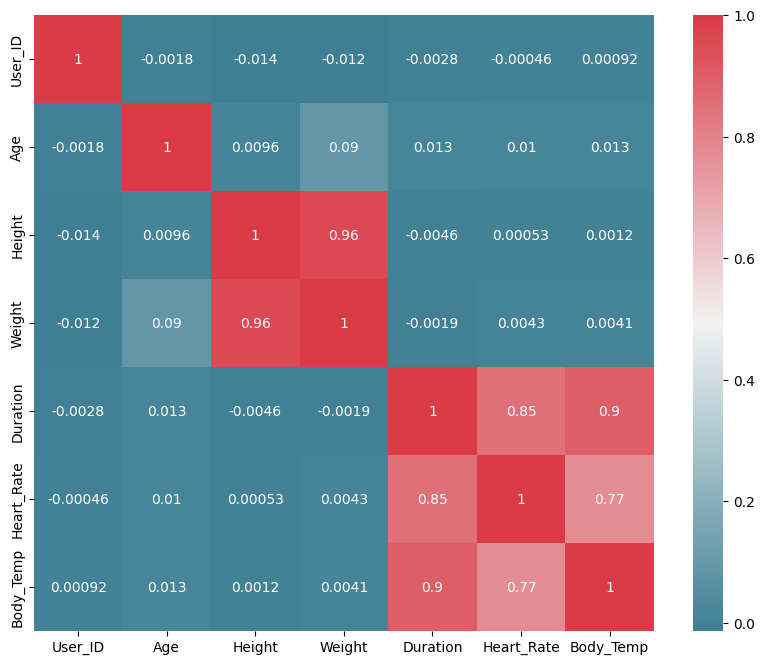

In [42]:
#Correlation between all the features
plt.figure(figsize=(10, 8))
sns.heatmap(exercise_data.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()


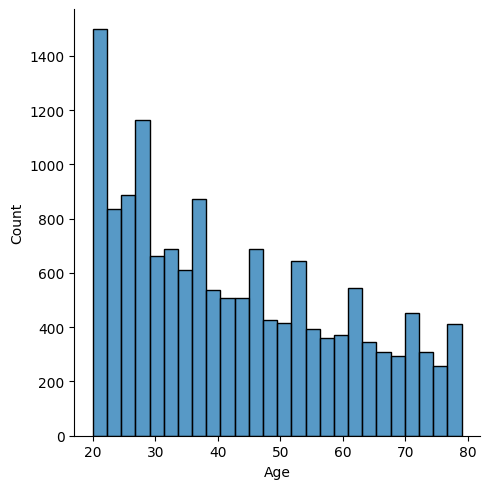

In [43]:
sns.displot(combine_calories_data['Age'])

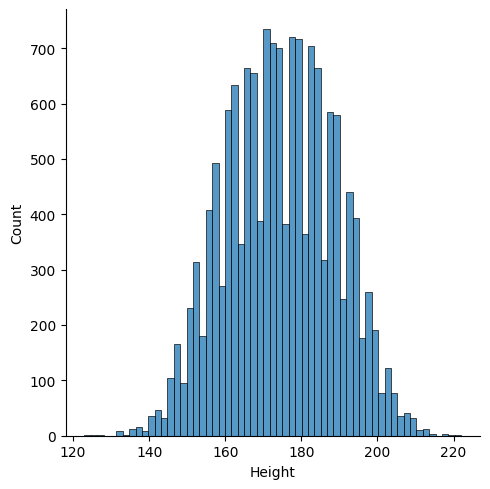

In [44]:
sns.displot(combine_calories_data['Height'])

Converting the text data to numerical values

In [45]:
combine_calories_data.replace({'Gender': {'male': 1, 'female': 0}}, inplace=True)

In [46]:
combine_calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [47]:
X = combine_calories_data.drop(['User_ID', 'Calories'], axis=1)
Y = combine_calories_data['Calories']

In [58]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [59]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Let split the data to train and test

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Training the model with XGBoost Regressor

In [49]:
model = XGBRegressor()

In [50]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:

train_predictions = model.predict(X_test)
print('R-squared:', metrics.r2_score(Y_test, train_predictions))

R-squared: 0.998800624504713


In [60]:
print(train_predictions)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [61]:
# Prediction on test data
test_prediction = model.predict(X_test)

In [63]:
print(test_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [65]:
mae = metrics.mean_absolute_error(Y_test, test_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132
